In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv('FuelConsumption.csv', sep=';')
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,16,4,A4,X,105,216
1,2000,ACURA,1.6EL,COMPACT,16,4,M5,X,98,205
2,2000,ACURA,3.2TL,MID-SIZE,32,6,AS5,Z,137,265
3,2000,ACURA,3.5RL,MID-SIZE,35,6,A4,Z,15,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,18,4,A4,X,114,230


In [2]:

df.dtypes

Year                 int64
MAKE                object
MODEL               object
VEHICLE CLASS       object
ENGINE SIZE          int64
CYLINDERS            int64
TRANSMISSION        object
FUEL                object
FUEL CONSUMPTION     int64
COEMISSIONS          int64
dtype: object

In [3]:
#Searching for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing:.2}%')

Year - 0.0%
MAKE - 0.0%
MODEL - 0.0%
VEHICLE CLASS - 0.0%
ENGINE SIZE - 0.0%
CYLINDERS - 0.0%
TRANSMISSION - 0.0%
FUEL - 0.0%
FUEL CONSUMPTION - 0.0%
COEMISSIONS  - 0.0%


In [4]:
df.describe(include="all")

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
count,638.0,638,638,638,638.000000,638.000000,638,638,638.000000,638.000000
unique,NaN,36,328,14,NaN,NaN,8,5,NaN,NaN
top,NaN,CHEVROLET,JETTA,COMPACT,NaN,NaN,A4,X,NaN,NaN
freq,NaN,63,6,105,NaN,NaN,323,454,NaN,NaN
mean,2000.0,NaN,NaN,NaN,26.608150,5.802508,NaN,NaN,136.451411,296.642633
std,0.0,NaN,NaN,NaN,16.602379,1.624535,NaN,NaN,47.959428,65.420203
min,2000.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,10.000000,104.000000
25%,2000.0,NaN,NaN,NaN,16.000000,4.000000,NaN,NaN,118.000000,253.000000
50%,2000.0,NaN,NaN,NaN,25.000000,6.000000,NaN,NaN,139.000000,288.000000
75%,2000.0,NaN,NaN,NaN,41.250000,6.000000,NaN,NaN,163.000000,343.000000


In [5]:
print(df.columns)

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')


In [6]:
##Sort by highest CO2 emission
df_sorted = df.sort_values(by=['COEMISSIONS '], inplace=False, ascending=False)
df_sorted.head(10)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
215,2000,FERRARI,550 MARANELLO,SUBCOMPACT,55,12,M6,Z,302,582
211,2000,FERRARI,456 MGT,SUBCOMPACT,55,12,A4,Z,267,513
213,2000,FERRARI,456 MGTA,SUBCOMPACT,55,12,A4,Z,267,513
212,2000,FERRARI,456 MGT,SUBCOMPACT,55,12,M6,Z,263,495
214,2000,FERRARI,456 MGTA,SUBCOMPACT,55,12,M6,Z,263,495
209,2000,FERRARI,360 MODENA F1,TWO-SEATER,36,8,AS6,Z,246,474
210,2000,FERRARI,360 MODENA F1,TWO-SEATER,36,8,M6,Z,241,472
379,2000,LAND ROVER,RANGE ROVER 4X4,SUV,46,8,A4,Z,221,458
177,2000,DODGE,DAKOTA 4X4,PICKUP TRUCK - STANDARD,59,8,A4,X,223,444
180,2000,DODGE,DURANGO 5.9 R/T 4X4,SUV,59,8,A4,Z,223,444


In [7]:
df.groupby(['MODEL']).mean(numeric_only=True)

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
MODEL,,,,,
1.6EL,2000.0,16.0,4.0,101.5,210.50
3.2TL,2000.0,32.0,6.0,137.0,265.00
3.5RL,2000.0,35.0,6.0,15.0,301.00
300M,2000.0,35.0,6.0,144.0,283.00
323 CONVERTIBLE,2000.0,25.0,6.0,142.5,286.50
...,...,...,...,...,...
XTERRA,2000.0,24.0,4.0,142.0,292.00
XTERRA V6,2000.0,33.0,6.0,162.0,340.50
XTERRA V6 4X4,2000.0,33.0,6.0,167.5,355.50


In [9]:
#average/comparate make and fuel + co2 = mapa de cor
mean_consumption = df.groupby(['MAKE'])[['COEMISSIONS ']].mean().reset_index()
mean_consumption = mean_consumption.round(2)

In [10]:
mean_consumption.head()

,MAKE,COEMISSIONS
0,ACURA,252.33
1,AUDI,280.59
2,BMW,291.24
3,BUICK,273.00
4,CADILLAC,323.00


In [11]:
mean_consumption_fuel = df.groupby(['FUEL CONSUMPTION'])[['COEMISSIONS ']].mean().reset_index()
mean_consumption_fuel = mean_consumption_fuel.round(2)

In [12]:
mean_consumption_fuel.head()

,FUEL CONSUMPTION,COEMISSIONS
0,10,205.50
1,12,242.75
2,13,259.00
3,14,282.29
4,15,295.71


In [13]:
df['FUEL CONSUMPTION'].unique()

array([105,  98, 137,  15, 114, 106, 108, 152, 154, 129, 111, 146, 132,
       136, 121, 149, 143, 155, 131, 123, 139, 138,  13, 145, 147, 164,
       191, 196,  14, 134, 193, 144, 151, 135, 212,  17, 174, 162, 177,
       163, 169, 187, 185, 189, 167, 179, 214, 116, 122, 125, 118, 178,
       182, 183, 206, 173, 201,  18, 211,  71,  91,  76, 161, 168, 117,
       119, 142, 109,  96, 113, 103, 104,  12, 176, 208, 181, 188, 223,
        20, 202, 215, 216, 221, 218, 246, 241, 267, 263, 302, 133, 199,
        19, 184, 171, 165, 207, 157, 156, 115,  10,  88,  49, 127,  97,
       166, 148, 153, 112, 128, 194, 159, 172, 102,  16, 126, 101,  93,
        99,  87,  86,  82, 186,  81,  67], dtype=int64)

In [14]:
filtered_values = mean_consumption_fuel[mean_consumption_fuel['FUEL CONSUMPTION'] > 100]
filtered_values

,FUEL CONSUMPTION,COEMISSIONS
25,101,201.0
26,102,212.0
27,103,204.0
28,104,207.0
29,105,219.4
...,...,...
119,241,472.0
120,246,474.0
121,263,495.0
122,267,513.0


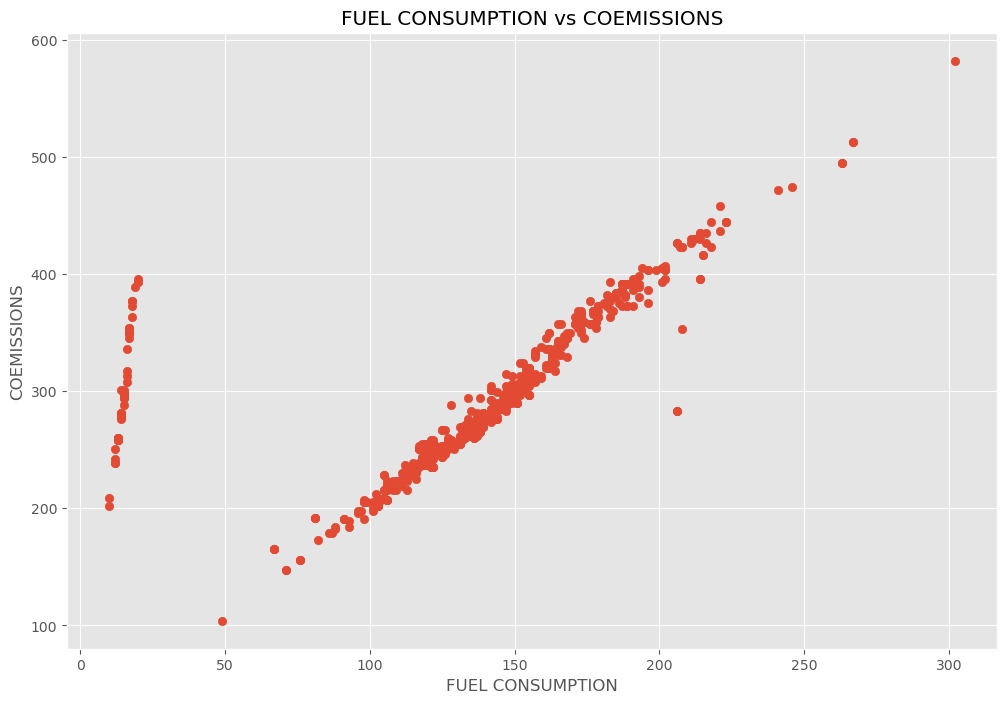

In [15]:
plt.scatter(df['FUEL CONSUMPTION'], df['COEMISSIONS '])
plt.xlabel('FUEL CONSUMPTION')
plt.ylabel('COEMISSIONS')
plt.title('FUEL CONSUMPTION vs COEMISSIONS')
plt.show()

In [16]:
#Correlation between the variables, which variables is more correlated with others?
df = df.drop('Year', axis=1)

# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number])

# Calcular a correlação entre as colunas numéricas
correlation = numeric_columns.corr(method='pearson')

In [17]:
correlation

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
ENGINE SIZE,1.000000,0.579701,0.331406,0.586452
CYLINDERS,0.579701,1.000000,0.512754,0.797799
FUEL CONSUMPTION,0.331406,0.512754,1.000000,0.627983
COEMISSIONS,0.586452,0.797799,0.627983,1.000000


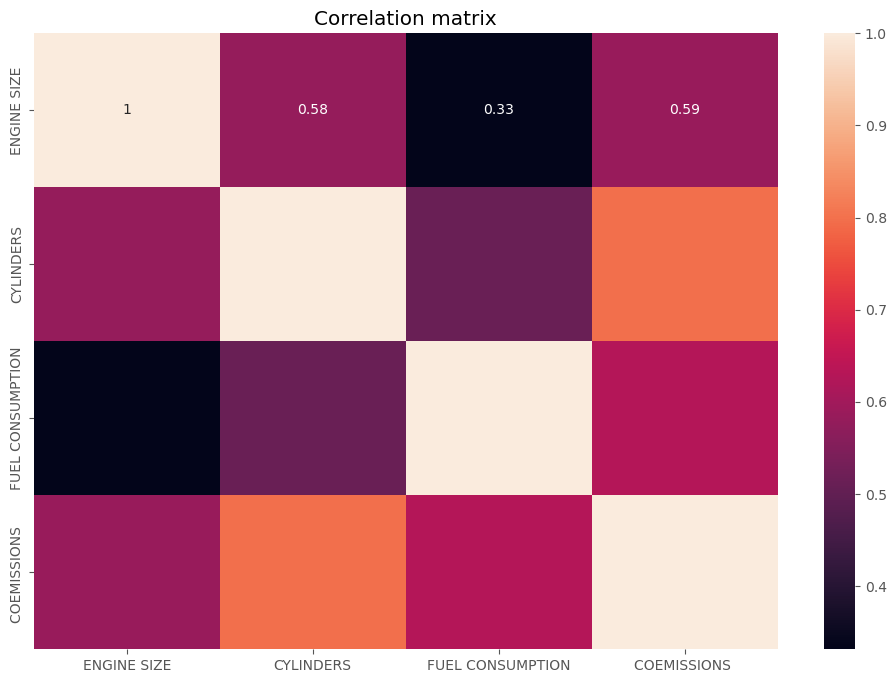

In [18]:
#Correlation Matrix
sns.heatmap(correlation, annot=True)

plt.title('Correlation matrix')

plt.show()

In [19]:
#The relation between fuel consumption and co2 emissions is intermediare, co2 emission is more related with Cylinders

In [20]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,0,0,0,16,4,1,3,105,216
1,0,0,0,16,4,6,3,98,205
2,0,1,2,32,6,4,4,137,265
3,0,2,2,35,6,1,4,15,301
4,0,164,9,18,4,1,3,114,230
...,...,...,...,...,...,...,...,...,...
633,35,303,7,24,5,1,4,144,288
634,35,304,7,24,5,1,4,136,274
635,35,305,7,23,5,1,4,139,274
636,35,305,7,23,5,6,4,13,260


In [21]:
df.dtypes

MAKE                 int8
MODEL               int16
VEHICLE CLASS        int8
ENGINE SIZE         int64
CYLINDERS           int64
TRANSMISSION         int8
FUEL                 int8
FUEL CONSUMPTION    int64
COEMISSIONS         int64
dtype: object

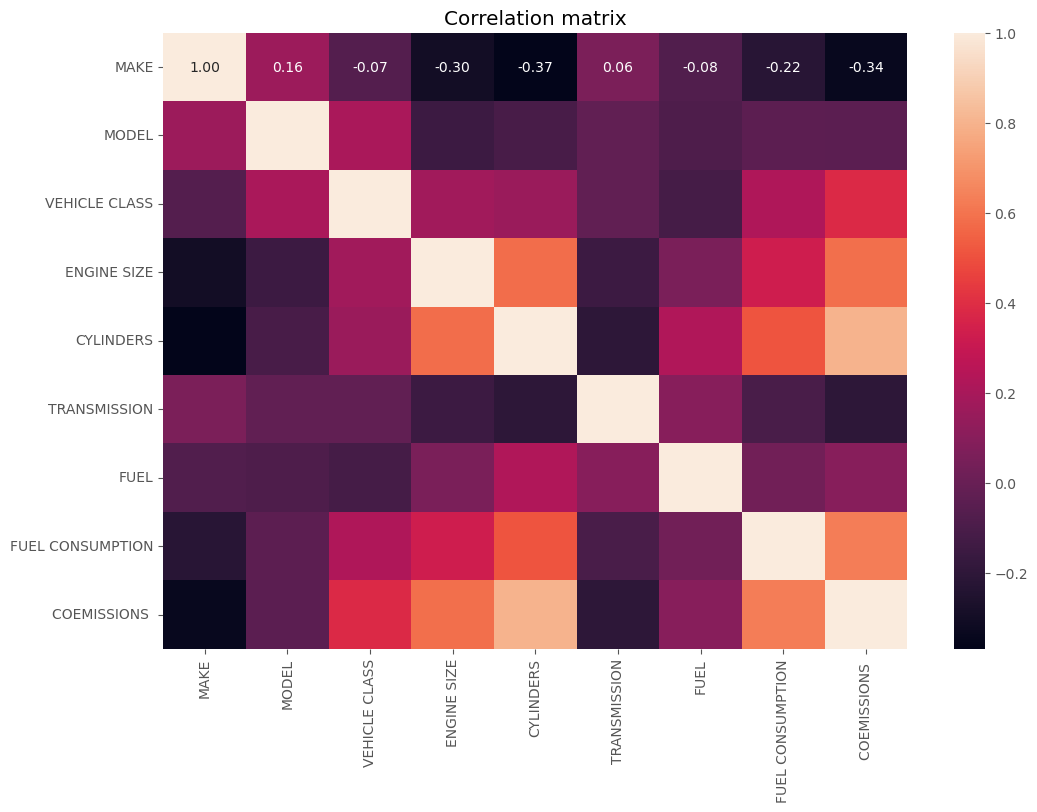

In [22]:
correlation2 = df_numerized.corr(method='pearson')

sns.heatmap(correlation2, annot=True,fmt=".2f")

plt.title('Correlation matrix')

plt.show()

In [23]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()

corr_pairs

MAKE          MAKE                1.000000
              MODEL               0.164809
              VEHICLE CLASS      -0.066571
              ENGINE SIZE        -0.303447
              CYLINDERS          -0.369091
                                    ...   
COEMISSIONS   CYLINDERS           0.797799
              TRANSMISSION       -0.206900
              FUEL                0.096882
              FUEL CONSUMPTION    0.627983
              COEMISSIONS         1.000000
Length: 81, dtype: float64

In [24]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

CYLINDERS         MAKE               -0.369091
MAKE              CYLINDERS          -0.369091
                  COEMISSIONS        -0.338151
COEMISSIONS       MAKE               -0.338151
ENGINE SIZE       MAKE               -0.303447
                                        ...   
                  ENGINE SIZE         1.000000
VEHICLE CLASS     VEHICLE CLASS       1.000000
MODEL             MODEL               1.000000
FUEL CONSUMPTION  FUEL CONSUMPTION    1.000000
COEMISSIONS       COEMISSIONS         1.000000
Length: 81, dtype: float64

In [25]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

FUEL CONSUMPTION  CYLINDERS           0.512754
CYLINDERS         FUEL CONSUMPTION    0.512754
ENGINE SIZE       CYLINDERS           0.579701
CYLINDERS         ENGINE SIZE         0.579701
ENGINE SIZE       COEMISSIONS         0.586452
COEMISSIONS       ENGINE SIZE         0.586452
FUEL CONSUMPTION  COEMISSIONS         0.627983
COEMISSIONS       FUEL CONSUMPTION    0.627983
                  CYLINDERS           0.797799
CYLINDERS         COEMISSIONS         0.797799
MAKE              MAKE                1.000000
CYLINDERS         CYLINDERS           1.000000
FUEL              FUEL                1.000000
TRANSMISSION      TRANSMISSION        1.000000
ENGINE SIZE       ENGINE SIZE         1.000000
VEHICLE CLASS     VEHICLE CLASS       1.000000
MODEL             MODEL               1.000000
FUEL CONSUMPTION  FUEL CONSUMPTION    1.000000
COEMISSIONS       COEMISSIONS         1.000000
dtype: float64

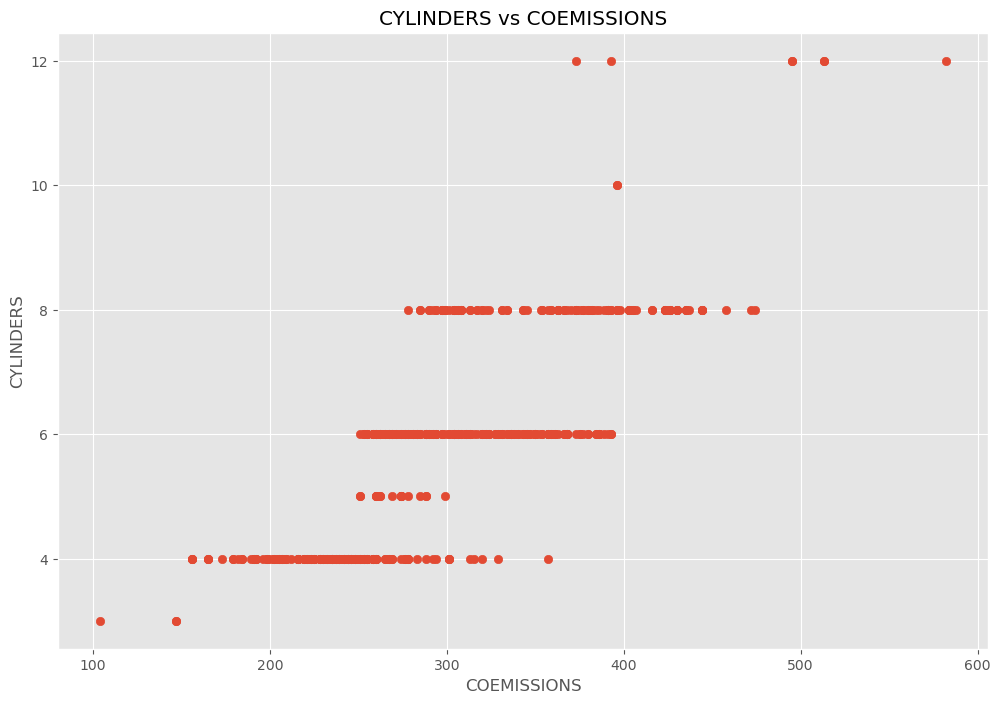

In [29]:
plt.scatter(df['COEMISSIONS '],df['CYLINDERS'])
plt.ylabel('CYLINDERS')
plt.xlabel('COEMISSIONS')
plt.title('CYLINDERS vs COEMISSIONS')
plt.show()

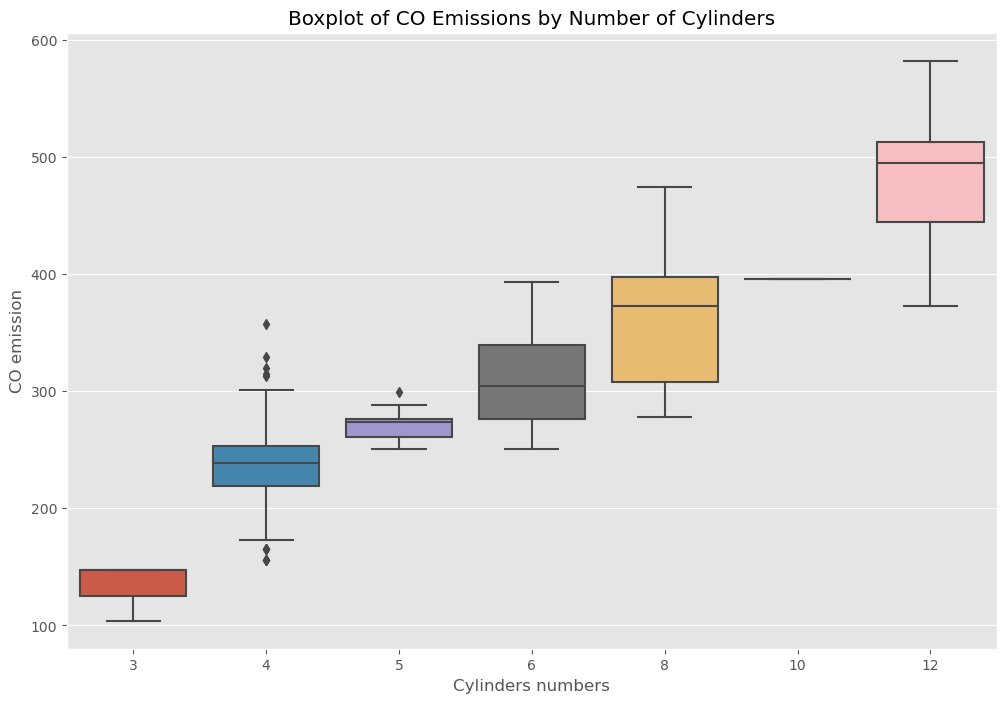

In [31]:
sns.boxplot(x='CYLINDERS', y='COEMISSIONS ', data=df)
plt.xlabel('Cylinders numbers')
plt.ylabel('CO emission')
plt.title('Boxplot of CO Emissions by Number of Cylinders')
plt.show()

###### The relationship between the number of cylinders and CO emissions in internal combustion engines can be explained by several factors. Firstly, engines with more cylinders generally consume more fuel due to their larger displacement volume, resulting in higher CO emissions. Additionally, these engines tend to produce more power, which requires more fuel and can lead to an increase in CO emissions. While engines with more cylinders may have improved combustion efficiency in certain aspects, under partial load conditions they may exhibit less complete fuel combustion, contributing to higher CO emissions. Furthermore, larger engines with more cylinders may have a less-than-ideal air/fuel ratio under some operating conditions, resulting in less efficient combustion and, consequently, higher CO emissions. These combined factors contribute to the observed relationship between the number of cylinders and CO emissions in internal combustion engines.

## Make vs CO emission

In [8]:
df.groupby(['MAKE', 'MODEL'])[['COEMISSIONS ']].sum()

COEMISSIONS 
MAKE  MODEL                           
ACURA 1.6EL                        421
      3.2TL                        265
      3.5RL                        301
      INTEGRA                      449
      INTEGRA GSR/TYPE R           223
...                                ...
VOLVO V70                          513
      V70 AWD TURBO                288
      V70 GLT TURBO                274
      V70 T5 TURBO                 534
      V70R AWD TURBO               299

[329 rows x 1 columns]

In [49]:
total_emissions_make = df.groupby('MAKE')['COEMISSIONS '].sum().reset_index()
#vamos separar por categoria, para carros de luxo essa marca emite mais co
total_emissions_make = total_emissions_make.sort_values(by='COEMISSIONS ', ascending=False)

total_emissions_make.head()

,MAKE,COEMISSIONS
10,FORD,20141
5,CHEVROLET,20067
8,DODGE,16889
11,GMC,13846
33,TOYOTA,11724


In [44]:
#

,MAKE,COEMISSIONS
0,ACURA,252.33
1,AUDI,280.59
2,BMW,291.24
3,BUICK,273.00
4,CADILLAC,323.00
